Подключение библиотек

In [1]:
import math
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import statsmodels.api as sm
import patsy as pt
import matplotlib.pyplot as plt
import xlwings as xw
import seaborn as sns
from scipy import stats
from math import sqrt
from scipy.stats import t, chi2, f
from scipy.stats import t, chi2, f, boxcox
from scipy.stats.mstats import gmean 
from statsmodels.regression.linear_model import OLS

# 1. Описание проблемы

## 1.1 Общая характеристика ситуации

Обеспокоенность и повышенное внимание к онкологии – одна из характерных черт здравоохранения всех развитых стран, что обусловлено устойчивой тенденцией роста онкологической заболеваемости.

Около 60% впервые в жизни регистрируемых злокачественных новообразований имеют III-IV стадию, что приводит к увеличению смертности и значительной инвалидизации больных. Ежегодно в России более 200 тыс. больных впервые признаются инвалидами вследствие онкологического заболевания (13,5% от общего числа инвалидов). Расходы на выплаты по инвалидности и лечению больных при III-IV стадии заболевания являются одной из наиболее затратных статей бюджета.

Для реального улучшения состояния здоровья населения, необходимо повышение эффективности деятельности в этом направлении не только государственных структур и учреждений здравоохранения, но и самих граждан. Так, в странах Евросоюза за 10 лет смертность от рака снизилась на 15% в результате воплощения в жизнь программы «Европа против рака», направленной на первичную профилактику злокачественных новообразований. Основными ее составляющими являются борьба с курением, оптимизация питания за счет увеличения потребления овощей и фруктов и уменьшения потребления продуктов животного происхождения, снижение отрицательного воздействия ультрафиолетовых лучей, выполнение рекомендаций по скринингу и ранней диагностике злокачественных образований.

## 1.2 Вклад автора работы

В своём небольшом исследовании автор работы попытается найти зависимость количества онкологических заболеваний от числа абортов, от количества онкологических заболеваний, от выбросов СО_2 и от показателей алкозависимости в РФ. Данные были взяты из официальных источников, таких как Росстат, European Commission, а также BP Statistical Review of World Energy (данные лежат в файле "Статистика по онкологии.xls"). Рассмотрим более подробно взаимосвязи между онкологическими заболеваниями и рядом факторов

### 1.2.1 Попарная зависимость 

#### 1.2.1.1 Взаимосвязь между онкологическими заболеваниями и болезнями нервной системы

Ученые Чикагского университета в начале XX века в ходе ряда экспериментов над мышами, обнаружили что нервные потрясения могут повлиять на ход болезни или даже изменить биологию заболевания. 

Мышь испытывает сильный стресс из-за отлучения от группы. У сидящих вдали от других животных грызунов вырабатывается больше гормонов стресса (кортикостероидов) и нарушается обмен веществ, связанный с переработкой жирных кислот. Эти выводы достаточно важны для врачей-онкологов. Кортикостероиды, как было показано в целом ряде научных исследований, влияют на многие биохимические процессы, переключают активность многих генов (включая те, что связаны с развитием рака)

Предлагается рассмотреть, подтверждаются ли подобные результаты в реальности. Для этого проведем анализ взаимосвязи между болезнями нервной системы и онкологическими заболеваниями.

У нас имеются данные по числу (тыс. человек) зарегистрированных заболеваний у больных с диагнозом, установленным впервые относительно нервных и онкологических заболеваний с 1990 по 2018 год. Для того, что бы исключить ошибку вследствие динамики населения в Российской Федерации, проведем нормировку (делим абсолютный показатель зарегистрированных болезней на население и умножаем на 100 000) и найдем число зарегистрированных заболеваний на
100 000 человек.

Загрузка данных

In [2]:
data = pd.read_excel('Статистика.xls', 'Лист2')[['Психические заболевания, установленные впервые в жизни на 100 000 населения', 'Онкологические заболевания, установленные впервые в жизни на 100 000 населения']]
# x - психические заболевания
x = data.iloc[:,:-1]
# y - онкозаболевания
y = data.iloc[:,-1]
data.head()

,"Психические заболевания, установленные впервые в жизни на 100 000 населения","Онкологические заболевания, установленные впервые в жизни на 100 000 населения"
0,93.1,279.1
1,93.2,288.1
2,90.5,294.7
3,89.3,302.4
4,83.8,304.1


Построение регрессии

In [3]:
# Создаём пустую форму регрессии
skm = lm.LinearRegression()
# Вычисляем параметры
skm.fit(x, y)
# Отображение коэфициентов
skm.intercept_, skm.coef_


f'y = {skm.coef_[0]}*x + {skm.intercept_}'

'y = -0.09424904133886539*x + 342.7353950898558'

Построение графика

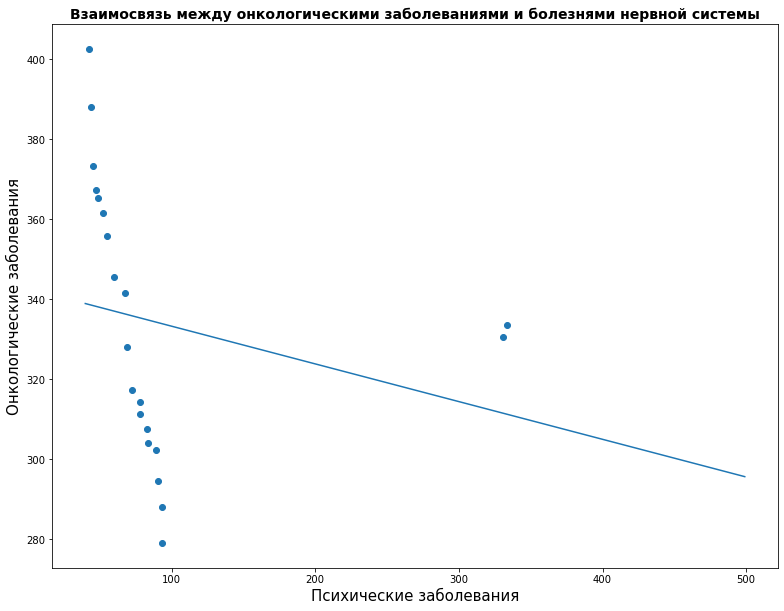

In [4]:
plt.figure(figsize=(13,10))
plt.title("Взаимосвязь между онкологическими заболеваниями и болезнями нервной системы", fontsize=14, fontweight="bold")
plt.xlabel("Психические заболевания", fontsize=15)
plt.ylabel("Онкологические заболевания", fontsize=15)
plt.scatter(data['Психические заболевания, установленные впервые в жизни на 100 000 населения'], data['Онкологические заболевания, установленные впервые в жизни на 100 000 населения'])
x3_data = [skm.coef_[0] * x + skm.intercept_ for x in range(40, 500)]
plt.plot([*range(40,500)], x3_data )
plt.show()

Есть выбросы в 2005 и 2006 годах. После изучения темы была выявлена ошибка в подсчетах Росстата. Убедиться в этом можно прочитав файл по ссылке:

http://mednet.ru/images/stories/files/statistika/Zabolevaemost_psihicheskimi_rasstroistvami_v_subektah_RF.pdf

Тогда с учетом поправок получим

Загрузка данных

In [5]:
data = pd.read_excel('Статистика.xls', 'Лист2')[['Психические заболевания (корректированные), установленные впервые в жизни на 100 000 населения', 'Онкологические заболевания, установленные впервые в жизни на 100 000 населения']]
# x - психические заболевания
x = data.iloc[:,:-1]
# y - онкозаболевания
y = data.iloc[:,-1]
data.head()

,"Психические заболевания (корректированные), установленные впервые в жизни на 100 000 населения","Онкологические заболевания, установленные впервые в жизни на 100 000 населения"
0,93.1,279.1
1,93.2,288.1
2,90.5,294.7
3,89.3,302.4
4,83.8,304.1


Построение регрессии

In [6]:
# Создаём пустую форму регрессии
skm = lm.LinearRegression()
# Вычисляем параметры
skm.fit(x, y)
# Отображение коэфициентов
skm.intercept_, skm.coef_

f'y = {skm.coef_[0]}*x + {skm.intercept_}'

'y = -1.9392677385267771*x + 465.720717279891'

Построение графика

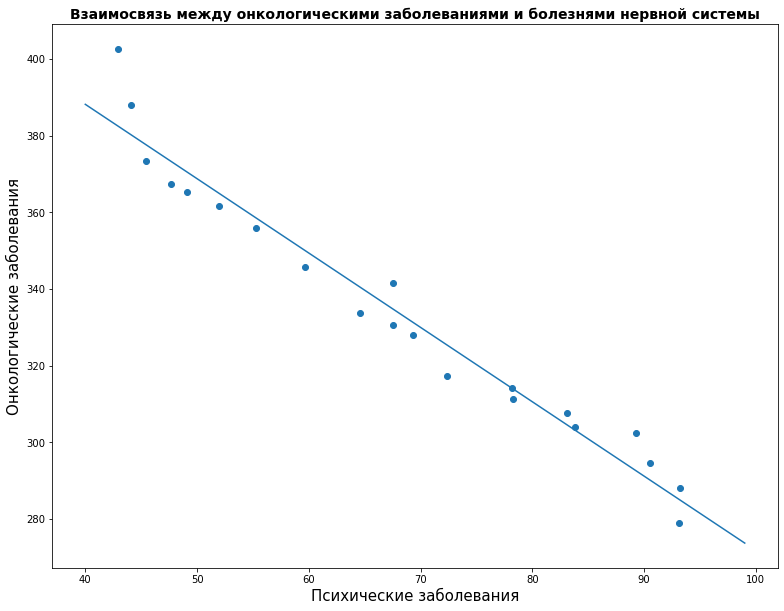

In [7]:
plt.figure(figsize=(13,10))
plt.title("Взаимосвязь между онкологическими заболеваниями и болезнями нервной системы", fontsize=14, fontweight="bold")
plt.xlabel("Психические заболевания", fontsize=15)
plt.ylabel("Онкологические заболевания", fontsize=15)
plt.scatter(data['Психические заболевания (корректированные), установленные впервые в жизни на 100 000 населения'], data['Онкологические заболевания, установленные впервые в жизни на 100 000 населения'])
x3_data = [skm.coef_[0] * x + skm.intercept_ for x in range(40, 100)]
plt.plot([*range(40,100)], x3_data )
plt.show()

#### 1.2.1.2 Взаимосвязь алкоголезависимости и онкологических заболеваний

Врачи утверждают, что между новообразованиями и такой социальной болезнью как алкоголизм есть прямая зависимость. Согласно научным исследованиям, это одна из трех основных причин возникновения раковых опухолей.

В человеческом организме есть ген, отвечающий за возникновение раковых опухолей – ген p53. О существовании этого гена ученые знают уже около 30 лет - установлено, что он может отдавать поврежденным клеткам "приказ" о самоуничтожении, либо останавливать их деление в момент, когда происходит восстановление организма. Также было доказано, что вещества содержащиеся в алкоголе и табачном дыме уничтожают или повреждают этот ген в человеке.

Делаем нормировку на 100 000 человек, аналогичную прошлому случаю

Загрузка данных

In [8]:
data = pd.read_excel('Статистика.xls', 'Лист2')[['Распространенность алкоголизма на 100 000 населения', 'Онкологические заболевания, установленные впервые в жизни на 100 000 населения']]
# x - употребление алкоголя
x = data.iloc[:,:-1]
# y - онкозаболевания
y = data.iloc[:,-1]
data.head()

,Распространенность алкоголизма на 100 000 населения,"Онкологические заболевания, установленные впервые в жизни на 100 000 населения"
0,61,279.1
1,67,288.1
2,72,294.7
3,70,302.4
4,71,304.1


Построение регрессии

In [9]:
# Создаём пустую форму регрессии
skm = lm.LinearRegression()
# Вычисляем параметры
skm.fit(x, y)
# Отображение коэфициентов
skm.intercept_, skm.coef_

f'y = {skm.coef_[0]}*x + {skm.intercept_}'

'y = 2.6135357987215775*x + 111.9167683371765'

Построение графика

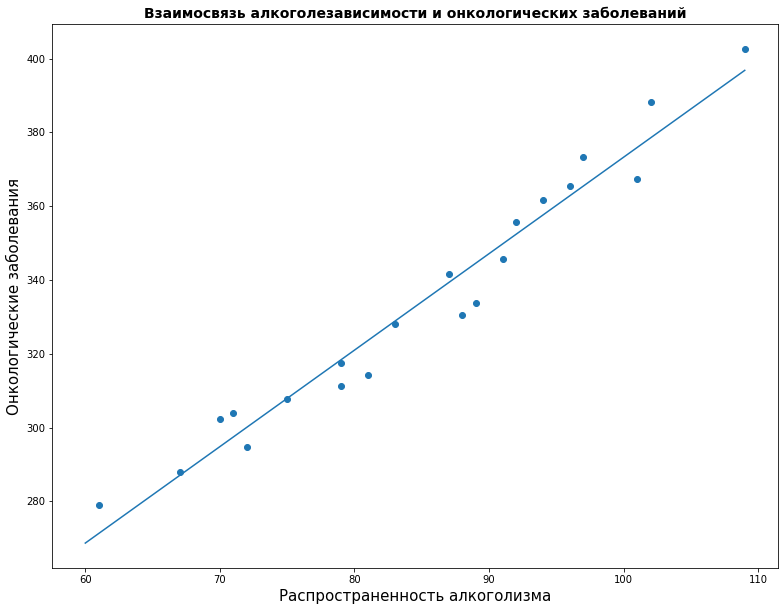

In [10]:
plt.figure(figsize=(13,10))
plt.title("Взаимосвязь алкоголезависимости и онкологических заболеваний", fontsize=14, fontweight="bold")
plt.xlabel("Распространенность алкоголизма", fontsize=15)
plt.ylabel("Онкологические заболевания", fontsize=15)
plt.scatter(data['Распространенность алкоголизма на 100 000 населения'], data['Онкологические заболевания, установленные впервые в жизни на 100 000 населения'])
x5_data = [skm.coef_[0] * x + skm.intercept_ for x in range(60, 110)]
plt.plot([*range(60, 110)], x5_data )
plt.show()


#### 1.2.1.3 Взаимосвязь абортов и злокачественных опухолей

Неоднократно врачи устанавливали взаимосвязь выкидышей и абортов со значительным увеличением риска рака и рака груди в частности груди. Проводимые медицинские исследования показывают, что этой причиной заболевания раком может быть аборт. 

Аборт первой беременности прерывает рост и изменение, которые готовят грудь к производству молока, оставляя ее при усиленном риске рака.

Врач "создатель" аборта, Малькольм Пайк явно идентифицировал аборт как фактор риска заболевания раком груди в 1981 году. 

Делаем нормировку на 100 000 человек, аналогичную прошлому случаю

Загрузка данных

In [11]:
data = pd.read_excel('Статистика.xls', 'Лист2')[['Число абортов на 100 000 населения', 'Онкологические заболевания, установленные впервые в жизни на 100 000 населения']]
# x - количество абортов
x = data.iloc[:,:-1]
# y - онкозаболевания
y = data.iloc[:,-1]
data.head()

,Число абортов на 100 000 населения,"Онкологические заболевания, установленные впервые в жизни на 100 000 населения"
0,1.871763,279.1
1,1.810095,288.1
2,1.710095,294.7
3,1.609849,302.4
4,1.502725,304.1


Построение регрессии

In [12]:
# Создаём пустую форму регрессии
skm = lm.LinearRegression()
# Вычисляем параметры
skm.fit(x, y)
# Отображение коэфициентов
skm.intercept_, skm.coef_

f'y = {skm.coef_[0]}*x + {skm.intercept_}'

'y = -76.71550408487062*x + 420.6135119779635'

Построение графика

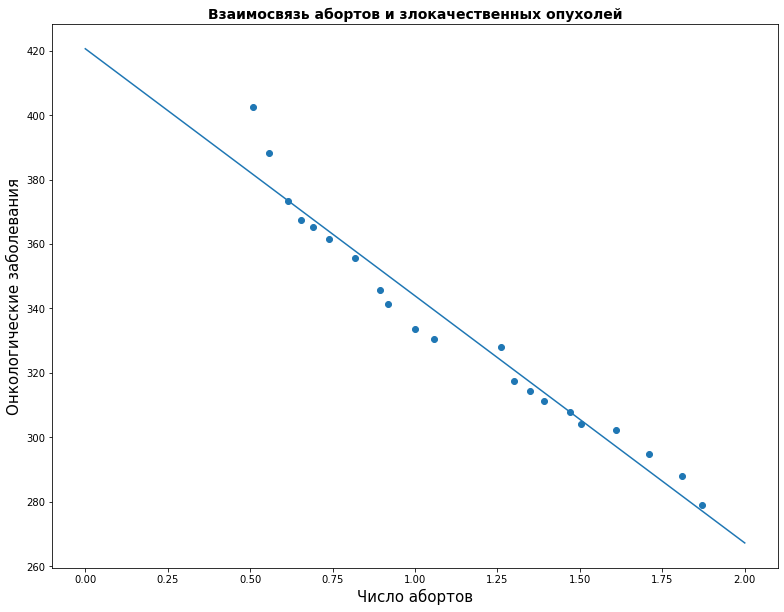

In [13]:
plt.figure(figsize=(13,10))
plt.title("Взаимосвязь абортов и злокачественных опухолей", fontsize=14, fontweight="bold")
plt.xlabel("Число абортов", fontsize=15)
plt.ylabel("Онкологические заболевания", fontsize=15)
plt.scatter(data['Число абортов на 100 000 населения'], data['Онкологические заболевания, установленные впервые в жизни на 100 000 населения'])
x2_data = [skm.coef_[0] * x + skm.intercept_ for x in range(0, 3)]
plt.plot([*range(0,3)], x2_data )
plt.show()

В данном случае можно считать выбросом первую точку. Характер изменений в 2014-2015 годы объясняется замещением аборта планированием семьи (агитационная политика, усиленные меры государственной поддержки)

Тогда предлагается выкинуть две точки при построении регрессии (на графике они останутся). Как будет заметно из графика ниже, это предложение имеет место быть

In [14]:
data = pd.read_excel('Статистика.xls', 'Лист2')[['Число абортов (корректированные) на 100 000 населения', 'Онкологические заболевания (корректированные), установленные впервые в жизни на 100 000 населения']]
# x - количество абортов
x = data.iloc[:19,:-1]
# y - онкозаболевания
y = data.iloc[:19,-1]
data.head()

,Число абортов (корректированные) на 100 000 населения,"Онкологические заболевания (корректированные), установленные впервые в жизни на 100 000 населения"
0,1.871763,279.1
1,1.810095,288.1
2,1.710095,294.7
3,1.609849,302.4
4,1.502725,304.1


Построение регрессии

In [15]:
# Создаём пустую форму регрессии
skm = lm.LinearRegression()
# Вычисляем параметры
skm.fit(x, y)
# Отображение коэфициентов
skm.intercept_, skm.coef_

f'y = {skm.coef_[0]}*x + {skm.intercept_}'

'y = -69.69557490557972*x + 410.5921245573374'

Построение графика

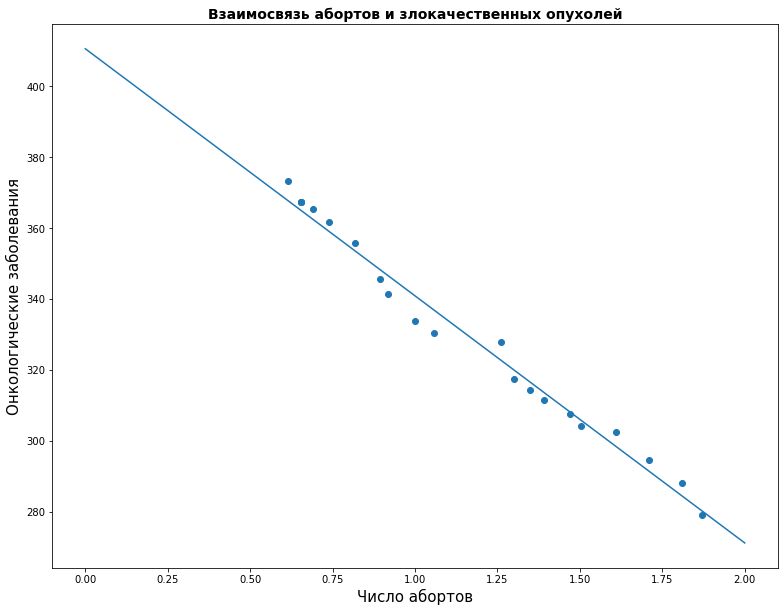

In [16]:
plt.figure(figsize=(13,10))
plt.title("Взаимосвязь абортов и злокачественных опухолей", fontsize=14, fontweight="bold")
plt.xlabel("Число абортов", fontsize=15)
plt.ylabel("Онкологические заболевания", fontsize=15)
plt.scatter(data['Число абортов (корректированные) на 100 000 населения'], data['Онкологические заболевания (корректированные), установленные впервые в жизни на 100 000 населения'])
x2_data = [skm.coef_[0] * x + skm.intercept_ for x in range(0, 3)]
plt.plot([*range(0,3)], x2_data )
plt.show()

#### 1.2.1.4 Взаимосвязь выбросов СО_2 и злокачественных опухолей

По данным Всемирной организации здравоохранения, здоровье на 50% зависит от образа жизни и на 25% – от состояния окружающей среды, но при рассмотрении онкологических заболеваний, фактор состояния окружающей среды увеличивается до 60-80%.

В атмосферном воздухе современных городов присутствуют сотни веществ различных химических классов органической и неорганической природы, поступающих из многочисленных источников, как правило, антропогенного происхождения. Около 30% всех онкологических заболеваний жителей промышленных районов обусловливает загрязнение атмосферы

В качестве простого примера, в исследовании предлагается рассмотреть выбросы СО_2 

Делаем нормировку на 100 000 человек, аналогичную прошлому случаю

Загрузка данных

In [17]:
data = pd.read_excel('Статистика.xls', 'Лист2')[['Выбросы СО2, Ктонн на 100 000 населения', 'Онкологические заболевания, установленные впервые в жизни на 100 000 населения']]
# x - выбросы СО_2
x = data.iloc[:,:-1]
# y - онкозаболевания
y = data.iloc[:,-1]
data.head()

,"Выбросы СО2, Ктонн на 100 000 населения","Онкологические заболевания, установленные впервые в жизни на 100 000 населения"
0,1185.131884,279.1
1,1163.722596,288.1
2,1093.726595,294.7
3,1099.322713,302.4
4,1136.951959,304.1


Построение регрессии

In [18]:
# Создаём пустую форму регрессии
skm = lm.LinearRegression()
# Вычисляем параметры
skm.fit(x, y)
# Отображение коэфициентов
skm.intercept_, skm.coef_

f'y = {skm.coef_[0]}*x + {skm.intercept_}'

'y = 0.4301835660165489*x + -181.758984503531'

Построение графика

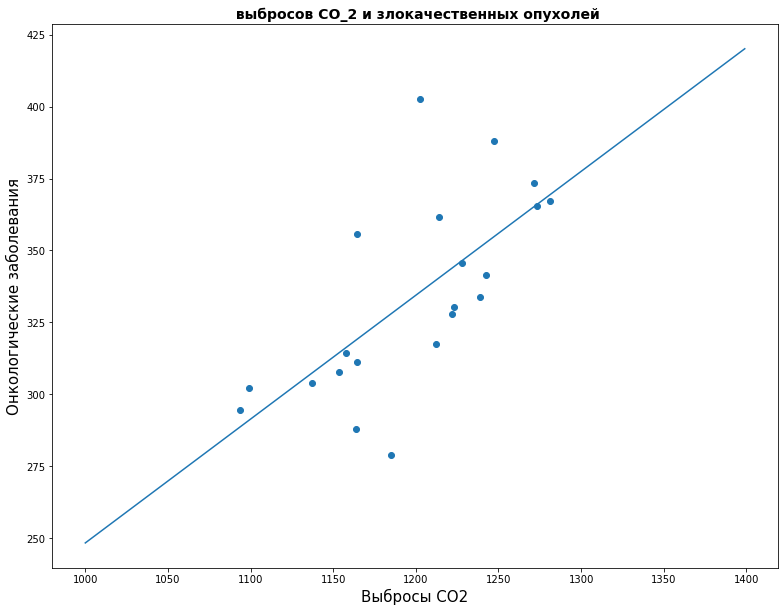

In [19]:
plt.figure(figsize=(13,10))
plt.title(" выбросов СО_2 и злокачественных опухолей", fontsize=14, fontweight="bold")
plt.xlabel("Выбросы СО2", fontsize=15)
plt.ylabel("Онкологические заболевания", fontsize=15)
plt.scatter(data['Выбросы СО2, Ктонн на 100 000 населения'], data['Онкологические заболевания, установленные впервые в жизни на 100 000 населения'])
x4_data = [skm.coef_[0] * x + skm.intercept_ for x in range(1000, 1400)]
plt.plot([*range(1000, 1400)], x4_data )
plt.show()

Такой разброс данных обуславливается разного рода соглашениями об экологии, а также методами подсчёта выбросов. 

В качестве примера можно рассмотреть 2011-2013 года. В это время заканчивался первый период действия Киотского Протокола.
Киотский протокол — международное соглашение, заключённое с целью сокращения выбросов парниковых газов в атмосферу Земли для противодействия глобальному потеплению.

Или, например, в 1996-1998 годах тестировалась новая методика выбросов СО_2 в атмосферу, которая подсчитывала коэффициент окисления углерода иначе.

Также стоит учесть, что эта характеристика может быть искусственно изменена в результате политического вмешательства.

Поэтому автор работы считает, что в таком виде искать взаимосвязь загрязнение атмосферы и онкологических заболеваний нецелесообразно

### 1.2.2 Зависимость по тройкам

В разделе 1.2.1 были рассмотрены различные зависимости и объяснены использования данных. Теперь предлагается посмотреть на зависимость онкологических заболеваний от двух параметров. В данном случае не будет строиться график, однако будут указаны уравнения.

Также не стоит забывать, что был отброшен фактор выбросов СО_2. Его в рассмотрение не берем

#### 1.2.2.1. Зависимость онкозаболеваний в зависимости от числа абортов и психических заболеваний

Загрузка данных

In [20]:
data = pd.read_excel('Статистика.xls', 'Лист2')[['Число абортов на 100 000 населения','Психические заболевания (корректированные), установленные впервые в жизни на 100 000 населения', 'Онкологические заболевания, установленные впервые в жизни на 100 000 населения']]
# x - год
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
data.head()

,Число абортов на 100 000 населения,"Психические заболевания (корректированные), установленные впервые в жизни на 100 000 населения","Онкологические заболевания, установленные впервые в жизни на 100 000 населения"
0,1.871763,93.1,279.1
1,1.810095,93.2,288.1
2,1.710095,90.5,294.7
3,1.609849,89.3,302.4
4,1.502725,83.8,304.1


Построение регрессии

In [21]:
# Создаём пустую форму регрессии
skm = lm.LinearRegression()
# Вычисляем параметры
skm.fit(x, y)
# Отображение коэфициентов
skm.intercept_, skm.coef_

(447.1459299159433, array([-32.85623317,  -1.11965437]))

Получаем уравнение

In [22]:
f'y = {skm.coef_[0]}*x1 + {skm.coef_[1]}*x2 + {skm.intercept_}'

'y = -32.85623316568422*x1 + -1.119654373816741*x2 + 447.1459299159433'

#### 1.2.2.2. Зависимость онкозаболеваний от числа абортов и показателя употребления алкоголя

Загрузка данных

In [23]:
data = pd.read_excel('Статистика.xls', 'Лист2')[['Число абортов на 100 000 населения','Распространенность алкоголизма на 100 000 населения', 'Онкологические заболевания, установленные впервые в жизни на 100 000 населения']]
# x - психические заболевания
x = data.iloc[:,:-1]
# y - онкозаболевания
y = data.iloc[:,-1]
data.head()

,Число абортов на 100 000 населения,Распространенность алкоголизма на 100 000 населения,"Онкологические заболевания, установленные впервые в жизни на 100 000 населения"
0,1.871763,61,279.1
1,1.810095,67,288.1
2,1.710095,72,294.7
3,1.609849,70,302.4
4,1.502725,71,304.1


Построение регрессии

In [24]:
# Создаём пустую форму регрессии
skm = lm.LinearRegression()
# Вычисляем параметры
skm.fit(x, y)
# Отображение коэфициентов
skm.intercept_, skm.coef_

(243.7996195850099, array([-33.31644229,   1.50417278]))

Получаем уравнение

In [25]:
f'y = {skm.coef_[0]}*x1 + {skm.coef_[1]}*x2 + {skm.intercept_}'

'y = -33.31644229495249*x1 + 1.504172778922948*x2 + 243.7996195850099'

#### 1.2.2.3. Зависимость онкозаболеваний от психических заболеваний и алкоголезависимости

Загрузка данных

In [26]:
data = pd.read_excel('Статистика.xls', 'Лист2')[['Психические заболевания (корректированные), установленные впервые в жизни на 100 000 населения', 'Распространенность алкоголизма на 100 000 населения', 'Онкологические заболевания, установленные впервые в жизни на 100 000 населения']]
# x - употребление алкоголя
x = data.iloc[:,:-1]
# y - онкозаболевания
y = data.iloc[:,-1]
data.head()

,"Психические заболевания (корректированные), установленные впервые в жизни на 100 000 населения",Распространенность алкоголизма на 100 000 населения,"Онкологические заболевания, установленные впервые в жизни на 100 000 населения"
0,93.1,61,279.1
1,93.2,67,288.1
2,90.5,72,294.7
3,89.3,70,302.4
4,83.8,71,304.1


Построение регрессии

In [27]:
# Создаём пустую форму регрессии
skm = lm.LinearRegression()
# Вычисляем параметры
skm.fit(x, y)
# Отображение коэфициентов
skm.intercept_, skm.coef_

(280.4729934764775, array([-0.93919624,  1.38066153]))

Получаем уравнение

In [28]:
f'y = {skm.coef_[0]}*x1 + {skm.coef_[1]}*x2 + {skm.intercept_}'

'y = -0.9391962353821005*x1 + 1.380661527401475*x2 + 280.4729934764775'

### 1.2.3 Зависимость полная

Были рассмотрены различные зависимости: по парам, по тройкам; теперь предлагается рассмотреть зависимость онкологических заболеваний от всех факторов в совокупности и построить общее уравнение

Загрузка данных

In [29]:
data = pd.read_excel('Статистика.xls', 'Лист2')[['Число абортов на 100 000 населения', 'Психические заболевания (корректированные), установленные впервые в жизни на 100 000 населения', 'Распространенность алкоголизма на 100 000 населения', 'Онкологические заболевания, установленные впервые в жизни на 100 000 населения']]
# x - год
x = data.iloc[:,:-1]
# y - онкозаболевания
y = data.iloc[:,-1]
data.head()

,Число абортов на 100 000 населения,"Психические заболевания (корректированные), установленные впервые в жизни на 100 000 населения",Распространенность алкоголизма на 100 000 населения,"Онкологические заболевания, установленные впервые в жизни на 100 000 населения"
0,1.871763,93.1,61,279.1
1,1.810095,93.2,67,288.1
2,1.710095,90.5,72,294.7
3,1.609849,89.3,70,302.4
4,1.502725,83.8,71,304.1


Построение регрессии

In [30]:
# Создаём пустую форму регрессии
skm = lm.LinearRegression()
# Вычисляем параметры
skm.fit(x, y)
# Отображение коэфициентов
skm.intercept_, skm.coef_

(285.3098596644084, array([-5.1376219 , -0.85282811,  1.32296485]))

Получаем уравнение

In [31]:
f'y = {skm.coef_[0]}*x1 + {skm.coef_[1]}*x2 + {skm.coef_[2]}*x3 + {skm.intercept_}'

'y = -5.137621900447334*x1 + -0.8528281083951067*x2 + 1.322964854825357*x3 + 285.3098596644084'

Далее автор работы предлагает посмотреть на корреляцию переменных по тепловой карте. Этот анализ является одним из методов, используемых для определения того, какие функции больше всего влияют на целевую переменную, и, в свою очередь, используются при прогнозировании этой целевой переменной. 

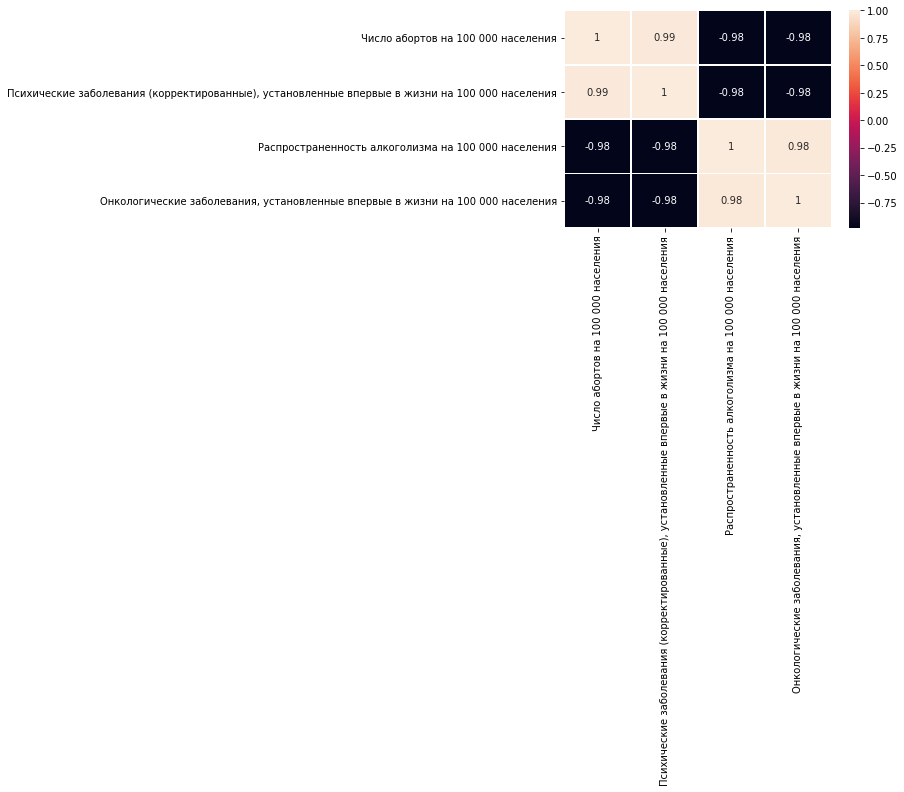

In [32]:
corr_matrix =data.corr()
sns.heatmap(corr_matrix, linewidths=.5, annot = True);

Интерпретировать такую диаграмму очень легко: считается, что между переменными есть связь, если коэффициент корреляции больше 0,7 (по модулю)
    
Как можно заметить, все оставшиеся переменные хорошо коррелируют с нашей целевой: онкологические заболевания

# 2. Выполнение задания 2

Загрузка данных

In [33]:
data = pd.read_excel('Статистика.xls', 'Лист2')[['Число абортов на 100 000 населения', 'Психические заболевания (корректированные), установленные впервые в жизни на 100 000 населения', 'Распространенность алкоголизма на 100 000 населения', 'Онкологические заболевания, установленные впервые в жизни на 100 000 населения']]
# x - год
x = data.iloc[:,:-1]
# y - онкозаболевания
y = data.iloc[:,-1]
data.head()

,Число абортов на 100 000 населения,"Психические заболевания (корректированные), установленные впервые в жизни на 100 000 населения",Распространенность алкоголизма на 100 000 населения,"Онкологические заболевания, установленные впервые в жизни на 100 000 населения"
0,1.871763,93.1,61,279.1
1,1.810095,93.2,67,288.1
2,1.710095,90.5,72,294.7
3,1.609849,89.3,70,302.4
4,1.502725,83.8,71,304.1


Охарактеризуем нашу регрессию:

1) Количество строчек данных: n=21

2) Количество параметров: k=4

3) n-k=17

In [34]:
# Создаём пустую форму регрессии
skm = lm.LinearRegression()
# Вычисляем параметры
skm.fit(x, y)
# Отображение коэфициентов
skm.intercept_, skm.coef_

(285.3098596644084, array([-5.1376219 , -0.85282811,  1.32296485]))

## 2.1. Построим доверительный интервал для второй оценки по формуле: $[\hat{\beta}_{OLC,2} - t_{c}s_{\hat{\beta_2}}, \hat{\beta}_{OLC,2} + t_{c}s_{\hat{\beta_2}}]$

In [35]:
t_c = stats.t.ppf(1-0.05/2, 17)
e = y - skm.predict(x)
s_b2 = sqrt(np.transpose(e).dot(e)*(np.linalg.inv((np.transpose(x).dot(x)))[2,2])/410)
t_lower = skm.coef_[2] - t_c*s_b2
t_upper = skm.coef_[2] + t_c*s_b2
/print(t_lower, t_upper)
f'Доверительный интервал получается такой: [{round(t_lower,2)};{round(t_upper,2)}]'

1.2779834413687856 1.3679462682819283


'Доверительный интервал получается такой: [1.28;1.37]'

## 2.2 Проверим гипотезу, что $\beta_2 = 0$: $|t| = \frac{\hat{\beta}_{OLC,2}}{s_{\hat{\beta_2}}} > t_c$ 

In [36]:
print(skm.coef_[2]/s_b2 - t_c)

59.942744471912896


На уровне значимости $\alpha = 0.05$ гипотеза отвергается.

## 2.3 Построим доверительный интервал для $\sigma^2$: $(n-k)\frac{s^2}{\sigma^2}$ распределено как $\chi^2(n-k)$

In [37]:
s2 = np.transpose(e).dot(e)/17
t_upper = 17*s2/stats.chi2.ppf(0.05/2, 17)
t_lower = 17*s2/stats.chi2.ppf(1-0.95/2, 17)
/print(t_lower, t_upper)
f'Доверительный интервал получается такой: [{round(t_lower,2)};{round(t_upper,2)}]'

38.11103065962032 84.13049997089307


'Доверительный интервал получается такой: [38.11;84.13]'

## 2.4 Проверка гипотезы незначимости регрессии

Статистика F имеет следующее распределение:

$F = \dfrac{ESS/(k-1)}{RSS/(n-k)} \sim F(k-1, n-k)$

При конкретных $k=4, n=21 и при уровне значимости $\alpha=0.048$ рассмотрим гипотезу.

In [38]:
data = pd.read_excel('Статистика.xls', 'Лист2')[['Число абортов на 100 000 населения', 'Психические заболевания (корректированные), установленные впервые в жизни на 100 000 населения', 'Распространенность алкоголизма на 100 000 населения', 'Онкологические заболевания, установленные впервые в жизни на 100 000 населения']]
# x - год
x = data.iloc[:,:-1]
# y - онкозаболевания
y = data.iloc[:,-1]


# Создаём пустую форму регрессии
skm = lm.LinearRegression()
# Вычисляем параметры
skm.fit(x, y)
# Сохранение коэфициентов
b1 = skm.coef_[0]
b2 = skm.coef_[1]
b3 = skm.coef_[2]

# Выводим параметры регрессии
n=21
k=4

# Проверка гипотезы незначимости регрессии: b2 = b3 = b4 = 0 на уровне значимости 5%
l = 0.048
ESS = np.sum((skm.predict(x)-np.mean(y))**2)
RSS = np.sum((skm.predict(x) - y) ** 2)
F_test = ESS * (n-k)/ (RSS * (k-1))
F = f.ppf (1-l, k-1, n-k)
#print (F_test, F)
if F_test <= F: print ("Гипотеза незначимости регрессии не отвергается")
else: print ("Гипотеза незначимости регрессии отвергается")

Гипотеза незначимости регрессии отвергается


## 2.5 Тест Бокса-Кокса  и Тест Зарембки

In [39]:
data = pd.read_excel('Статистика.xls', 'Лист2')[['Число абортов на 100 000 населения', 'Психические заболевания (корректированные), установленные впервые в жизни на 100 000 населения', 'Распространенность алкоголизма на 100 000 населения', 'Онкологические заболевания, установленные впервые в жизни на 100 000 населения']]
# x - год
x = data.iloc[:,:-1].values
# y - онкозаболевания
y = data.iloc[:,-1]


#Линейная модель
skm_lin = lm.LinearRegression()
# calculate parameters
skm_lin.fit(x, y)

#Полулогарифмическая модель
ln_y = np.log(y)
skm_log = lm.LinearRegression()
# calculate parameters
skm_log.fit(x, ln_y)

# Выводим параметры регрессии
n=21
k=4

In [40]:
#Строим вспомогательный y' и вспомогательные регрессии
y_meangeom = gmean(y)
y_new = y/y_meangeom #это y'

skm_lin_new = lm.LinearRegression()
skm_lin_new.fit(x, y_new)

y_log_new = np.log(y_new)
skm_log_new = lm.LinearRegression()
skm_log_new.fit(x, y_log_new)

#Считаем значения RSS для новых регрессий
RSS_lin = np.sum((skm_lin_new.predict(x) - y_new) ** 2)
RSS_log = np.sum((skm_log_new.predict(x) - y_log_new) ** 2)

### 2.5.1 Тест Бокса-Кокса

In [41]:
#Задаем массив RSS и значений лямбда
RSS = []
LMBDA = []
FINAL = []
x_lmbda = []
x_new = data.drop([str(list(data)[-1])], axis=1).values
#Выполняем преобразование Бокса-Кокса для 50 значений лямбда от 0 до 1 
for i in np.linspace(0, 1, 50):
    y_lmbda = boxcox(y_new, i)
    
    for elem in x_new:
        x_ = boxcox(elem, i)
        x_lmbda.append(x_)
    
    #x_lmbda = boxcox(x_new, i)
    lr_lmbda = lm.LinearRegression()
    lr_lmbda.fit(x_lmbda, y_lmbda)
    RSS_add = np.sum((lr_lmbda.predict(x_lmbda) - y_lmbda) ** 2)
    RSS.append(RSS_add)
    print(RSS_add)
    LMBDA.append(i)
    FINAL.append(RSS)
    x_lmbda = []

l = np.argmin(RSS)
model = ''
if round(LMBDA[l]) == 0:
    model = 'логарифмическая модель.'
if round(LMBDA[l]) == 1: 
    model = 'линейная модель.'
print ('Значение лямбда, при котором RSS минимален, равно', LMBDA[l], ', поэтому больше подходит', model)

0.0021135843518850558
0.0021352929793778085
0.0021594177276745784
0.0021860579127150415
0.00221531176580737
0.0022472755760364247
0.002282042734923118
0.002319702683119996
0.002360339761081357
0.0024040319681975213
0.0024508496378298633
0.002500854039003229
0.002554095919162521
0.0026106140063090802
0.0026704334928974614
0.0027335645279636034
0.002800000747902379
0.0028697178799251257
0.0029426724552811725
0.0030188006715910574
0.0030980174448644033
0.0031802156917380784
0.003265265880958071
0.0033530158899895387
0.0034432911977749165
0.0035358954380647106
0.003630611329505198
0.0037272019889775902
0.0038254126238507326
0.003924972587234241
0.004025597768498593
0.004126993279805615
0.004228856388748804
0.004330879637996077
0.004432754085571078
0.004534172594518578
0.004634833098465123
0.004734441770154493
0.004832716023382668
0.004929387284704188
0.005024203479497546
0.005116931187016917
0.0052073574303819
0.005295291079486534
0.0053805638569521756
0.005463030948958161
0.00554257123356

In [42]:
RSS_add

0.0057627703506506235

### 2.5.2 Тест Зарембки

In [43]:
#Строим статистику и проверяем гипотезу H0 на уровне значимости 4,8%
stat_hi2 = n/2*abs(math.log(RSS_lin/RSS_log))
l = 0.048
HI =  chi2.ppf (1-l, 1)
if stat_hi2 > HI: 
    if RSS_lin < RSS_log: print ("H0 отвергается, выбираем линейную модель")
    else: print ("H0 отвергается, выбираем полулогарифмическукю модель")
else: print ("H0 не отвергается, модели не имеют статистически значимых различий")

H0 отвергается, выбираем полулогарифмическукю модель


## 2.6 Проверка на мультиколлинеарность

In [44]:
data = pd.read_excel('Статистика.xls', 'Лист2')[['Число абортов на 100 000 населения', 'Психические заболевания (корректированные), установленные впервые в жизни на 100 000 населения', 'Распространенность алкоголизма на 100 000 населения', 'Онкологические заболевания, установленные впервые в жизни на 100 000 населения']]

data.head()

,Число абортов на 100 000 населения,"Психические заболевания (корректированные), установленные впервые в жизни на 100 000 населения",Распространенность алкоголизма на 100 000 населения,"Онкологические заболевания, установленные впервые в жизни на 100 000 населения"
0,1.871763,93.1,61,279.1
1,1.810095,93.2,67,288.1
2,1.710095,90.5,72,294.7
3,1.609849,89.3,70,302.4
4,1.502725,83.8,71,304.1


In [45]:
x = data[['Число абортов на 100 000 населения', 'Психические заболевания (корректированные), установленные впервые в жизни на 100 000 населения', 'Распространенность алкоголизма на 100 000 населения']].values

Мультиколлинеарность возникает, когда две и более независимых переменных сильно связаны друг с другом (разумеется, имеется в виду линейная связь).

**Последствия мультиколлинеарности:**

1) Если мультиколлинеарность строгая (коэффициент корреляции переменных по модулю равен 1), то невозможно оценить коэффициенты и рассчитать ошибки.

2) Если мультиколлинеарность нестрогая – неверные оценки коэффициентов и большие стандартные ошибки.

3) Неустойчивость оценок: возможны неверные выводы из-за больших стандартных ошибок (получаем заниженные t–статистики). Из-за этого при удалении нескольких или даже одного наблюдения из выборки можно получить совсем другие оценки коэффициентов, даже с противоположными знаками.

**Индикаторы мультиколлинеарности:**

1) Высокий R2 и незначимые коэффициенты.

2) Сильная парная корреляция предикторов.

3) Сильные частные корреляции предикторов.

4) Высокий VIF – variance inflation factor (показатель “вздутия” дисперсии).

### 2.6.1 vif

In [46]:
def vif(X):
    exog = X - np.nanmean(X, 0); variables = np.arange(exog.shape[1])
    vifs = np.r_[[OLS(exog[:, i], exog[:, variables != i]).fit().rsquared for i in variables]]
    return 1/(1.-vifs)

In [47]:
vif(x)

array([57.27146709, 45.75668306, 26.59936849])

### 2.6.2 тепловая коррелиционная карта

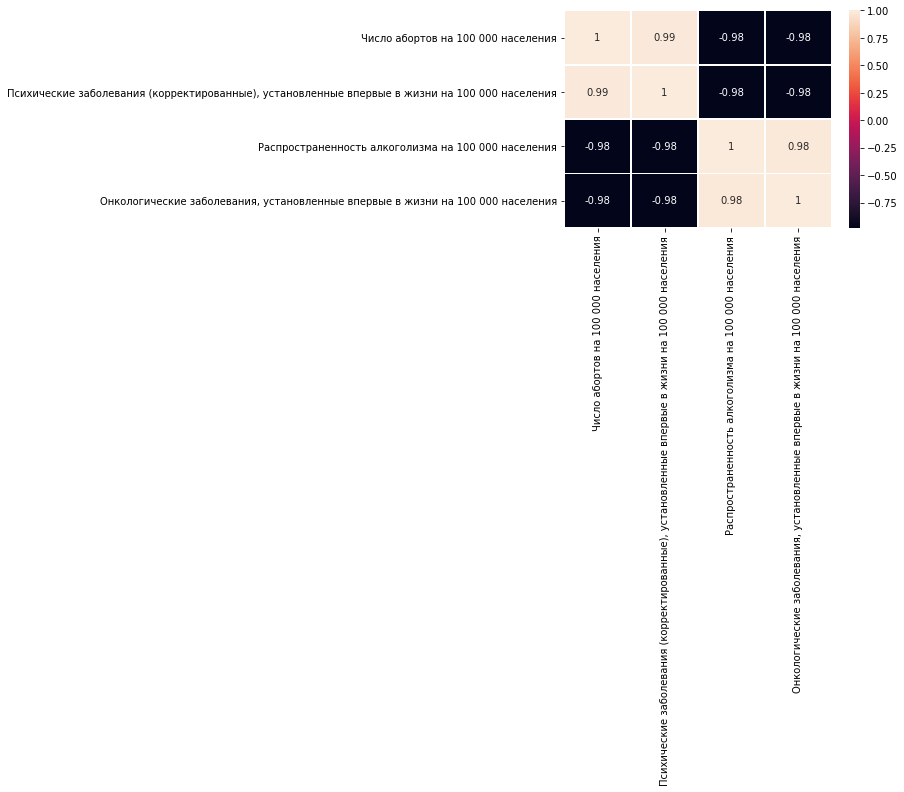

In [48]:
corr_matrix =data.corr()
sns.heatmap(corr_matrix, linewidths=.5, annot = True);

По всей видимости, у меня есть мультиколлинеарность)))

Тогда решим эту проблему следующим методом:

**Ридж регрессия**

Ридж-регрессия или гребневая регрессия (ridge regression) - это один из методов понижения размерности. Часто его применяют для борьбы с переизбыточностью данных, когда независимые переменные коррелируют друг с другом (т.е. имеет место мультиколлинеарность).

In [49]:
# Создаём пустую форму регрессии
skm = lm.Ridge()
# Вычисляем параметры
skm.fit(x, y)
# Отображение коэфициентов
skm.intercept_, skm.coef_

(281.3688065128573, array([-0.34619666, -0.93635264,  1.3724461 ]))